In [1]:
import pandas as pd

In [2]:
tmpmos = pd.read_csv('obs_daily.csv', header=[0, 1], skipinitialspace=True)
obs = tmpmos.set_index(tmpmos['Unnamed: 0_level_0']['station']).drop('Unnamed: 0_level_0', axis=1).drop('date')

In [3]:
tmpmos = pd.read_csv('mos_daily.csv', header=[0, 1], skipinitialspace=True)
mos = tmpmos.set_index(tmpmos['Unnamed: 0_level_0']['station']).drop('Unnamed: 0_level_0', axis=1).drop('date')

C:\Users\haize\Miniconda3\envs\mos\lib\site-packages\pandas\core\generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [4]:
shared_index = mos.index.intersection(obs.index)
mos_t = mos.loc[shared_index]
obs_t = obs.loc[shared_index]

In [5]:
obs_t.index = pd.to_datetime(obs_t.index)
mos_t.index = pd.to_datetime(mos_t.index)

In [6]:
for st in ['KJFK', 'KLGA', 'KNYC']:
        mos_t['wsmq', st] = mos_t['wspq', st] * (1609.93/3600)
        obs_t['wsmq', st] = obs_t['wspq', st]/10

In [7]:
%matplotlib inline


In [8]:
import matplotlib.pyplot as plt
import cmocean as cmo


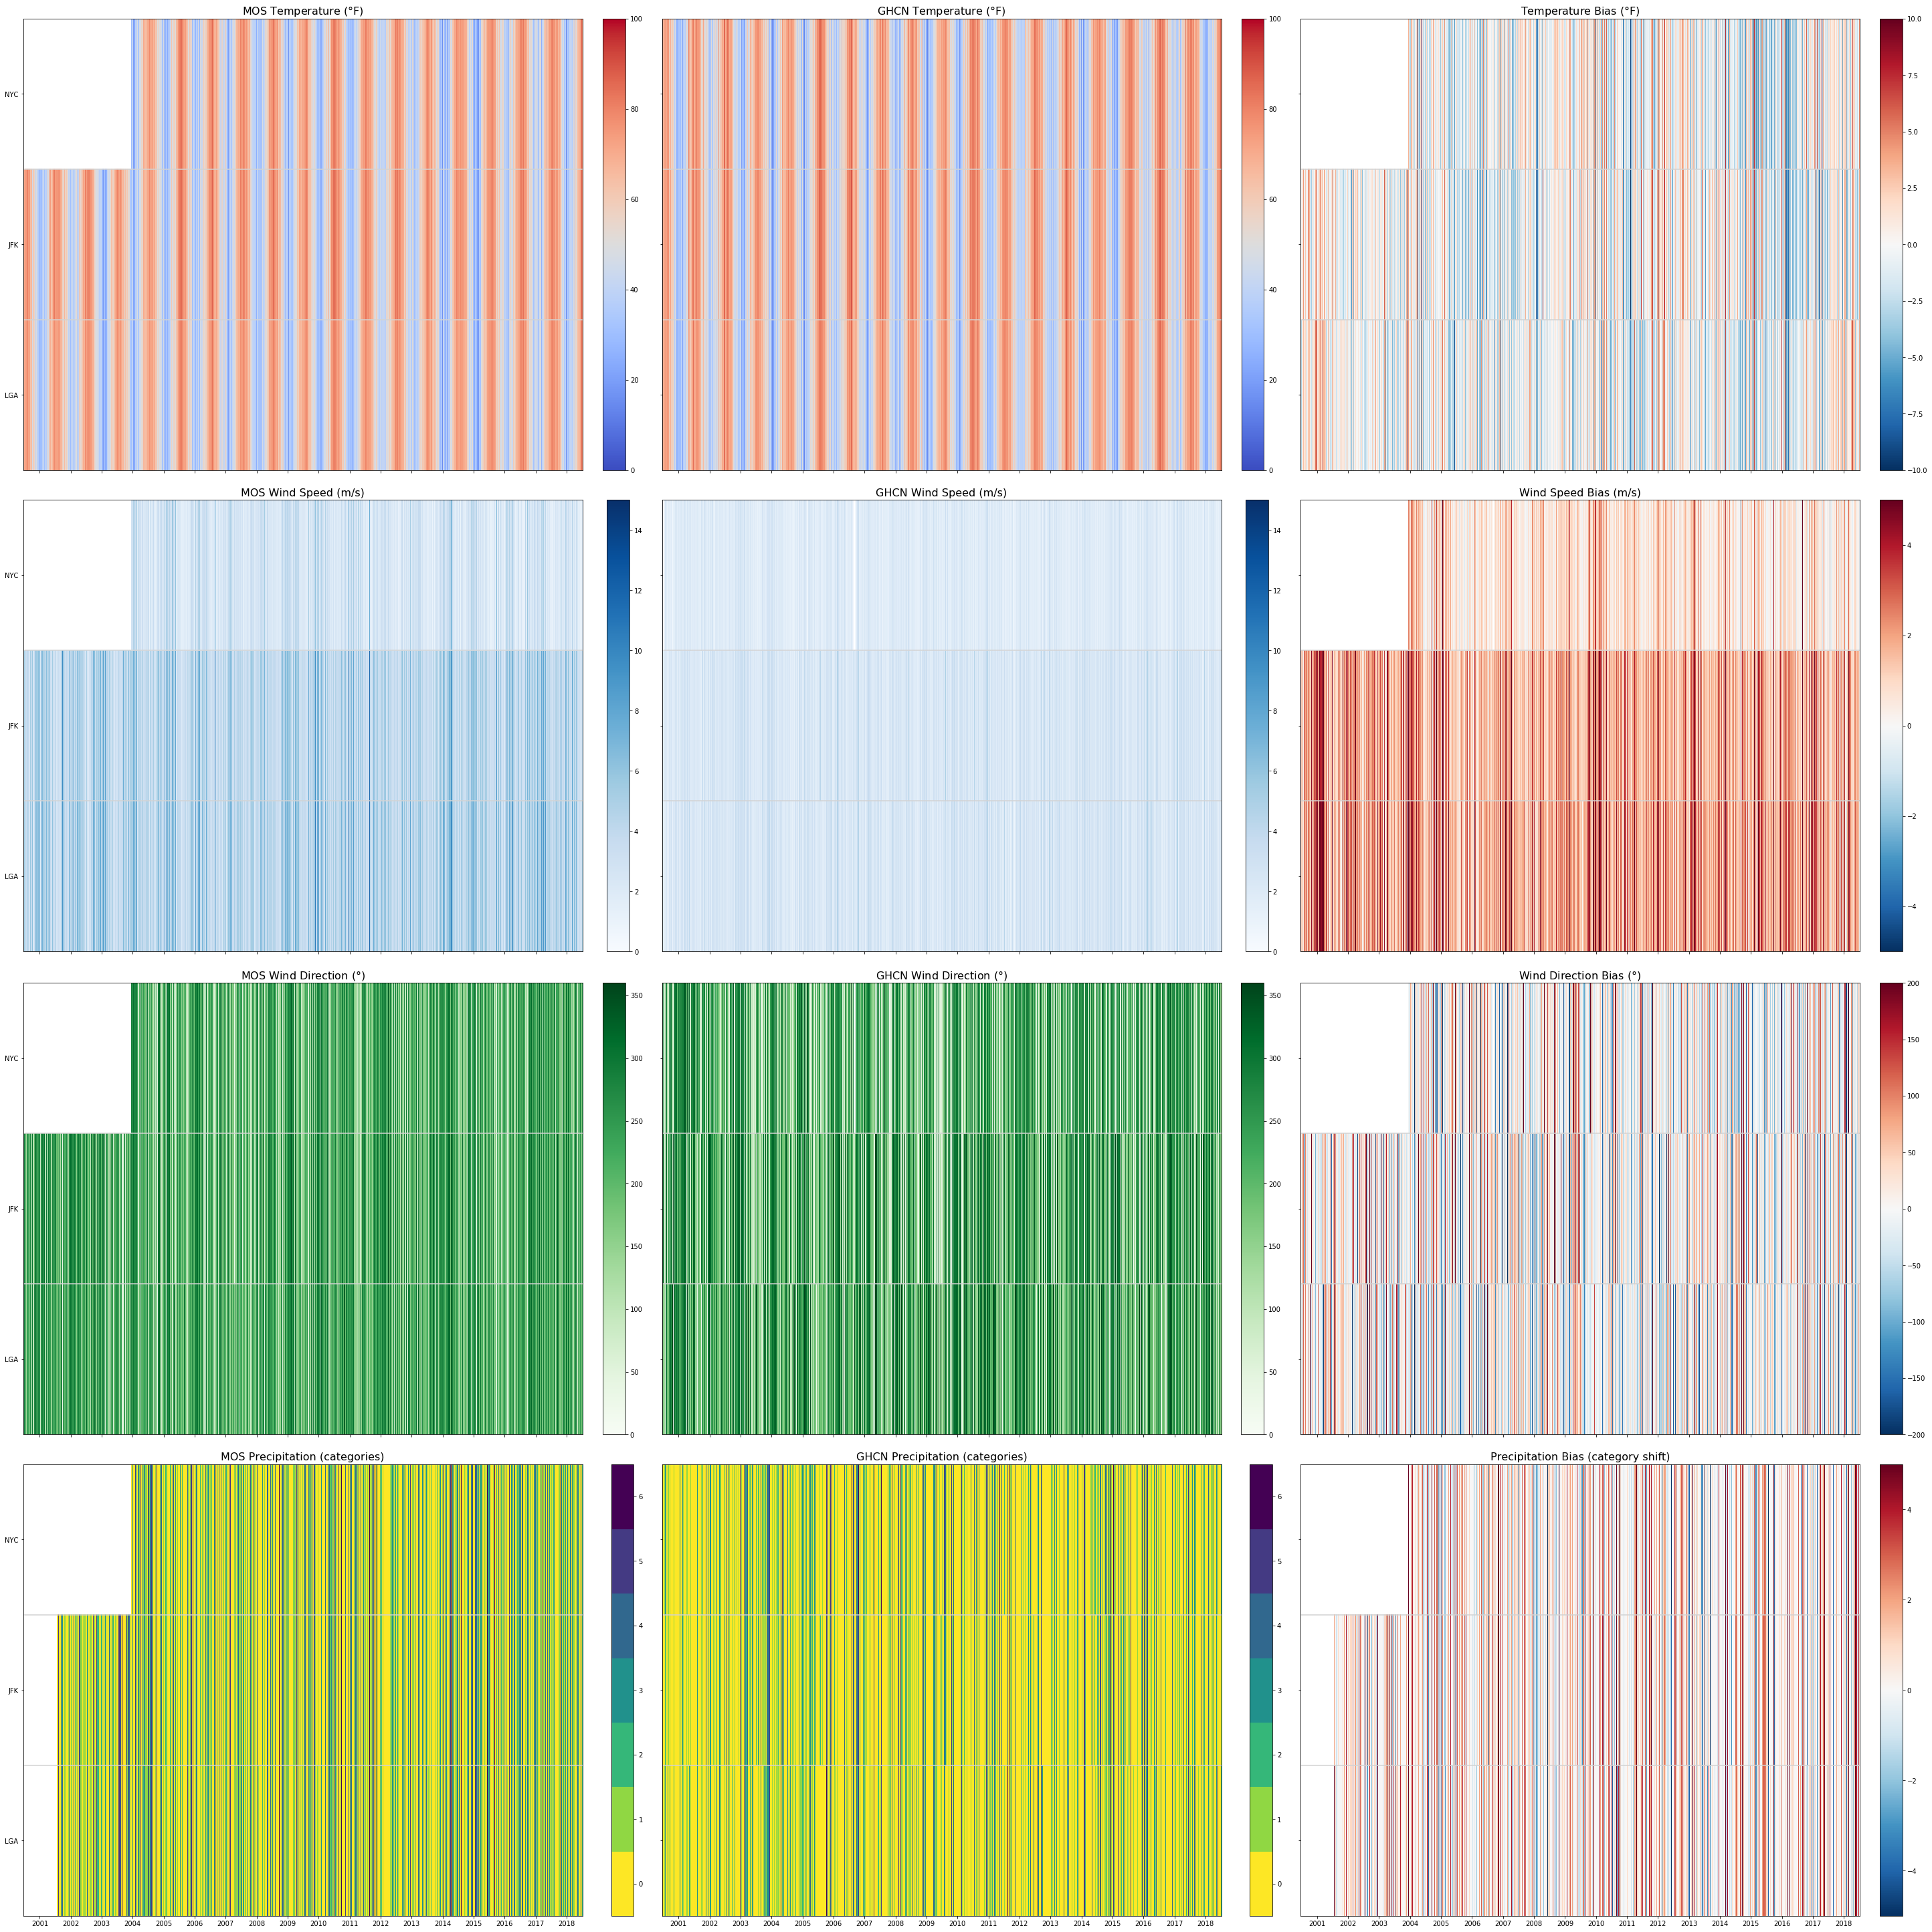

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, sharey=True, figsize=(40,40), constrained_layout=True)

# temperature
axes[0,0].set_title(r"MOS Temperature ($\degree$F)", fontsize=16)
im1 = axes[0,0].pcolormesh(mos_t['tmpq'].T, cmap='coolwarm', vmin=0, vmax=100)
fig.colorbar(im1, ax=axes[0,0])
axes[0,1].set_title(r"GHCN Temperature ($\degree$F)", fontsize=16)
im2 = axes[0,1].pcolormesh(obs_t['tmpq'].T, cmap='coolwarm', vmin=0, vmax=100)
fig.colorbar(im2, ax=axes[0,1])
axes[0,2].set_title(r"Temperature Bias ($\degree$F)", fontsize=16)
im3 = axes[0,2].pcolormesh((mos_t['tmpq']-obs_t['tmpq']).T, cmap='RdBu_r', vmin=-10, vmax=10)
fig.colorbar(im3, ax=axes[0,2])

# windspeed 
axes[1,0].set_title("MOS Wind Speed (m/s)", fontsize=16)
im1 = axes[1,0].pcolormesh(mos_t['wsmq'].T, cmap='Blues', vmin=0, vmax=15)
fig.colorbar(im1, ax=axes[1,0])
axes[1,1].set_title("GHCN Wind Speed (m/s)", fontsize=16)
im2 = axes[1,1].pcolormesh(obs_t['wsmq'].T, cmap='Blues', vmin=0, vmax=15)
fig.colorbar(im2, ax=axes[1,1])
axes[1,2].set_title("Wind Speed Bias (m/s)", fontsize=16)
im3 = axes[1,2].pcolormesh((mos_t['wsmq']-obs_t['wsmq']).T, cmap='RdBu_r', vmin=-5, vmax=5)
fig.colorbar(im3, ax=axes[1,2])

# windspeed 
axes[2,0].set_title(r"MOS Wind Direction ($\degree$)", fontsize=16)
im1 = axes[2,0].pcolormesh(mos_t['wdrq'].T, cmap='Greens', vmin=0, vmax=360)
fig.colorbar(im1, ax=axes[2,0])
axes[2,1].set_title(r"GHCN Wind Direction ($\degree$)", fontsize=16)
im2 = axes[2,1].pcolormesh(obs_t['wdrq'].T, cmap='Greens', vmin=0, vmax=360)
fig.colorbar(im2, ax=axes[2,1])
axes[2,2].set_title(r"Wind Direction Bias ($\degree$)", fontsize=16)
im3 = axes[2,2].pcolormesh((mos_t['wdrq']-obs_t['wdrq']).T, cmap='RdBu_r', vmin=-200, vmax=200)
fig.colorbar(im3, ax=axes[2,2])

# windspeed 
import matplotlib.cm as mcm
import numpy as np
import matplotlib.colors as mcolors

cmap = mcm.viridis_r
norm = mcolors.BoundaryNorm([0,1,2,3,4,5,6,7], cmap.N)
cbticks = np.arange(.5, 7.5, 1)
cbticklabs = [0,1,2,3,4,5,6]

axes[3,0].set_title("MOS Precipitation (categories)", fontsize=16)
im1 = axes[3,0].pcolormesh(mos_t['prpq'].T, cmap=cmap, norm=norm)
cb1 = fig.colorbar(im1, ax=axes[3,0])
cb1.set_ticks(cbticks)
cb1.set_ticklabels(cbticklabs)

axes[3,1].set_title("GHCN Precipitation (categories)", fontsize=16)
im2 = axes[3,1].pcolormesh(obs_t['prpq'].T, cmap=cmap, norm=norm)
cb2 = fig.colorbar(im2, ax=axes[3,1])
cb2.set_ticks(cbticks)
cb2.set_ticklabels(cbticklabs)

axes[3,2].set_title("Precipitation Bias (category shift)", fontsize=16)
im3 = axes[3,2].pcolormesh((mos_t['prpq']-obs_t['prpq']).T, cmap='RdBu_r', vmin=-5, vmax=5)
fig.colorbar(im3, ax=axes[3,2])

_ = axes[0,0].set_yticks([.5, 1.5, 2.5])
_ = axes[0,0].set_yticklabels(['LGA', 'JFK', 'NYC'])
locs = ((obs_t.index.month==1) & (obs_t.index.day==1)).nonzero()[0]
labs = obs_t.index[locs].strftime('%Y')
_ = axes[0,0].set_xticks(locs)
_ = axes[0,0].set_xticklabels(labs, rotation=90)

for ax in axes.flatten():
    ax.axhline(1, color='lightgray')
    ax.axhline(2, color='lightgray')
fig.savefig("table.png", bbox_inches='tight')